# Sobre el dataset

El Dataset de **Elegibilidad para tarjetas de crédito** reúne una serie de variables que buscan identificar los factores que influyen en la elegibilidad de una persona para obtener una tarjeta de crédito.  
Incluye datos demográficos, financieros y personales de cada individuo, como género, edad, ingresos, estado de empleo, estado familiar, tipo de vivienda, nivel educativo y ocupación. Cada individuo está representado por un ID único, y el conjunto de datos ofrece una visión completa de sus antecedentes y circunstancias.  

El **Objetivo** es entender cómo se relacionan estas variables con la elegibilidad de una persona para obtener una tarjeta de crédito y predecir si una persona es elegible o no para obtener una tarjeta de crédito.

### Descripción de las columnas:
**1. ID:** Un identificador para cada cliente.  
**2. Gender:** El género del cliente.  
**3. Own_car:** Una característica binaria que indica si el cliente posee un automóvil.  
**4. Own_property:** Una característica binaria que indica si el cliente posee una propiedad.  
**5. Work_phone:** Una característica binaria que indica si el cliente tiene un teléfono de trabajo.  
**6. Phone:** Una característica binaria que indica si el cliente tiene un teléfono.  
**7. Email:** Una característica binaria que indica si el cliente ha proporcionado una dirección de correo electrónico.    
**8. Unemployed:** Una característica binaria que indica si el cliente está desempleado.  
**9. Num_children:** El número de hijos que tiene el cliente.  
**10. Num_family:** El número total de miembros de la familia.  
**11. Account_length:** La duración de la cuenta del cliente con un banco o institución financiera.  
**12. Total_income:** El ingreso total del cliente.  
**13. Age:** La edad del cliente.  
**14. Years_employed:** El número de años que el cliente ha estado empleado.  
**15. Income_type:** El tipo de ingreso (por ejemplo, empleado, autónomo, etc.).  
**16. Education_type:** El nivel educativo del cliente.  
**17. Family_status:** El estado civil del cliente.  
**18. Housing_type:** El tipo de vivienda en la que vive el cliente.  
**19. Occupation_type:** El tipo de ocupación en la que está empleado el cliente.  
**20. Target:** La variable objetivo para la tarea de clasificación, que indica si el cliente es elegible para una tarjeta de crédito o no (por ejemplo, Sí/No, 1/0).  

# Indíce
**1- Importar librerias**  
**2- Cargar y examinar los datos**  
**3- Manejo de valores nulos y duplicados**  
**4- Dividir las variables numericas y categoricas**    
**5- Manejo de valores outliers**  
**6- Ingeniería de características**    
**7- Guardar el dataset procesado**  

#### 1. Importar librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

from sklearn.preprocessing import OneHotEncoder


import os
from sys import path
import os
path.append(os.path.abspath(os.path.join('..')))
from util.util import *


Confiuguracion de las visualizaciones

In [2]:
# Cambiar el color de fondo de plt
plt.rcParams['figure.facecolor'] = '#363636'
plt.rcParams['axes.facecolor'] = '#363636'
plt.rcParams['axes.edgecolor'] = '#FFFFFF'
# plt.rcParams['ax']

In [3]:
os.chdir('..')

#### 2. Cargar y examinar los datos

In [4]:
df= pd.read_csv('data/raw/Dataset.csv', sep=',')

In [5]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [7]:
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


#### 3. Manejo de valores nulos y duplicados

In [8]:
# buscar valores nulos
df.isnull().sum()*100/len(df)

ID                 0.0
Gender             0.0
Own_car            0.0
Own_property       0.0
Work_phone         0.0
Phone              0.0
Email              0.0
Unemployed         0.0
Num_children       0.0
Num_family         0.0
Account_length     0.0
Total_income       0.0
Age                0.0
Years_employed     0.0
Income_type        0.0
Education_type     0.0
Family_status      0.0
Housing_type       0.0
Occupation_type    0.0
Target             0.0
dtype: float64

In [9]:
# buscar valores duplicados
df.duplicated().sum()

0

Como podemos ver no existen nulos ni duplicados en el dataset. asi que no es necesario hacer algún tratamiento

#### 4 Dividir las variables numericas y categoricas

Eliminamos la variable ID ya que no aporta información relevante

In [10]:
df.drop('ID', axis=1, inplace=True)

In [11]:
# columnas numericas
num_cols = df.select_dtypes(include=('int64', 'float64'))

# columnas booleanas
bool_cols = df[num_cols.columns[(df[num_cols.columns].isin([0,1])).all()]]

# removemos las columnas booleanas de las numericas
num_cols.drop(bool_cols.columns.to_list(), axis=1, inplace=True)

# columnas categoricas
str_cols = df.select_dtypes(include='object')
cat_cols= df[str_cols.columns.tolist()+ bool_cols.columns.tolist()]
print(f'Columnas Totales: {len(df.columns)}')
print(f'Columnas Booleanas: {len(bool_cols.columns)}')
print(f'Columnas Object: {len(str_cols.columns)}')
print(f'Columnas categoricas: {len(cat_cols.columns)}')
print(f'Columnas numericas: {len(num_cols.columns)}')

Columnas Totales: 19
Columnas Booleanas: 8
Columnas Object: 5
Columnas categoricas: 13
Columnas numericas: 6


#### 5. Manejo de valores outliers

Mostrar los valores outliers de las variables numericas

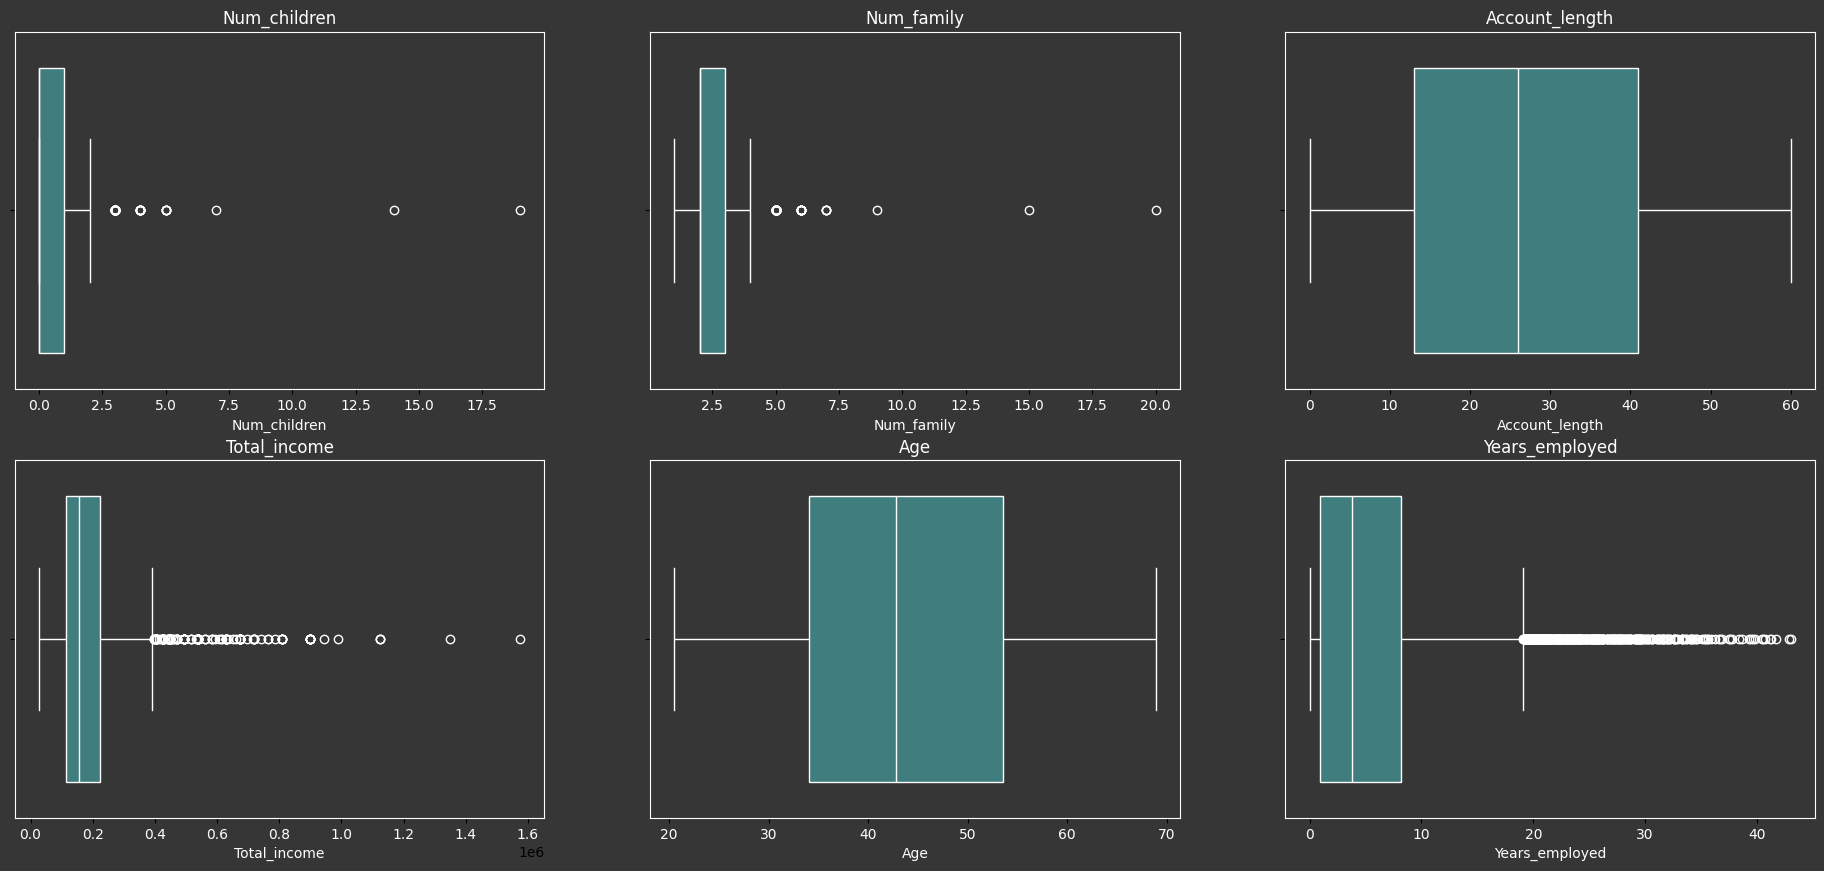

In [12]:
plt.figure(figsize=(60, 25))
for i,column in enumerate(num_cols.columns):
    plt.subplot(len(num_cols.columns),3,i+1)
    plt.subplots_adjust(left=0.7, right=1, top=1, bottom=0)
    sns.boxplot(x=df[column], color='#34878A', linecolor='white')
    plt.title(column, color='white')
    plt.xlabel(column, color='white')
    plt.xticks(color='white')
    plt.title(column)

Trataremos los outliers reemplazando por la mediana, para no perder información 

In [13]:
num_cols= get_outliers(num_cols, median= True)

Outliers in Num_children: 152 or 1.57%
--Percentage of outliers after replace for the median  in Num_children: 0 or 0.00%--
Outliers in Num_family: 142 or 1.46%
--Percentage of outliers after replace for the median  in Num_family: 0 or 0.00%--
Outliers in Account_length: 0 or 0.00%
--Percentage of outliers after replace for the median  in Account_length: 0 or 0.00%--
Outliers in Total_income: 318 or 3.28%
--Percentage of outliers after replace for the median  in Total_income: 0 or 0.00%--
Outliers in Age: 0 or 0.00%
--Percentage of outliers after replace for the median  in Age: 0 or 0.00%--
Outliers in Years_employed: 469 or 4.83%
--Percentage of outliers after replace for the median  in Years_employed: 0 or 0.00%--
(9709, 6)


#### 5. Ingenieria de caracteristicas

### 5.1 Variables numericas

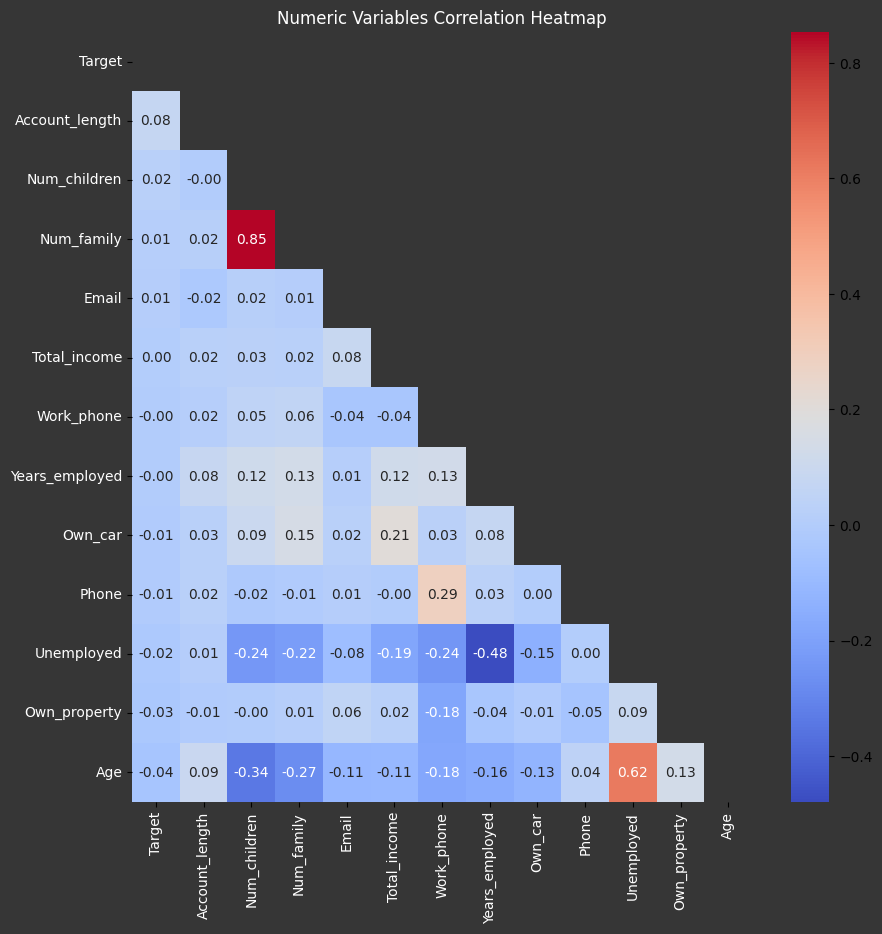

In [58]:
# Correlacion entre variables numericas
df_corr = df.copy()
df_corr['Target']=df['Target']
mask = np.triu(np.ones_like(df_corr.corr(numeric_only= True), dtype=bool))
corr = df.corr(numeric_only= True).sort_values(by='Target', ascending=False, axis=0).sort_values(by='Target', ascending=False, axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            mask= mask)
plt.xticks(color='white')
plt.yticks(color='white')
plt.title("Numeric Variables Correlation Heatmap", color='white')
plt.show()

Como podemos observar las variables con mas correlacion con respecto a la target  son: **'Account_length'** ,**Total_income'** y **'Age'**, veamos su distribucion con respecto a la target

#### 5.1.1 Distribucion de las variables numericas

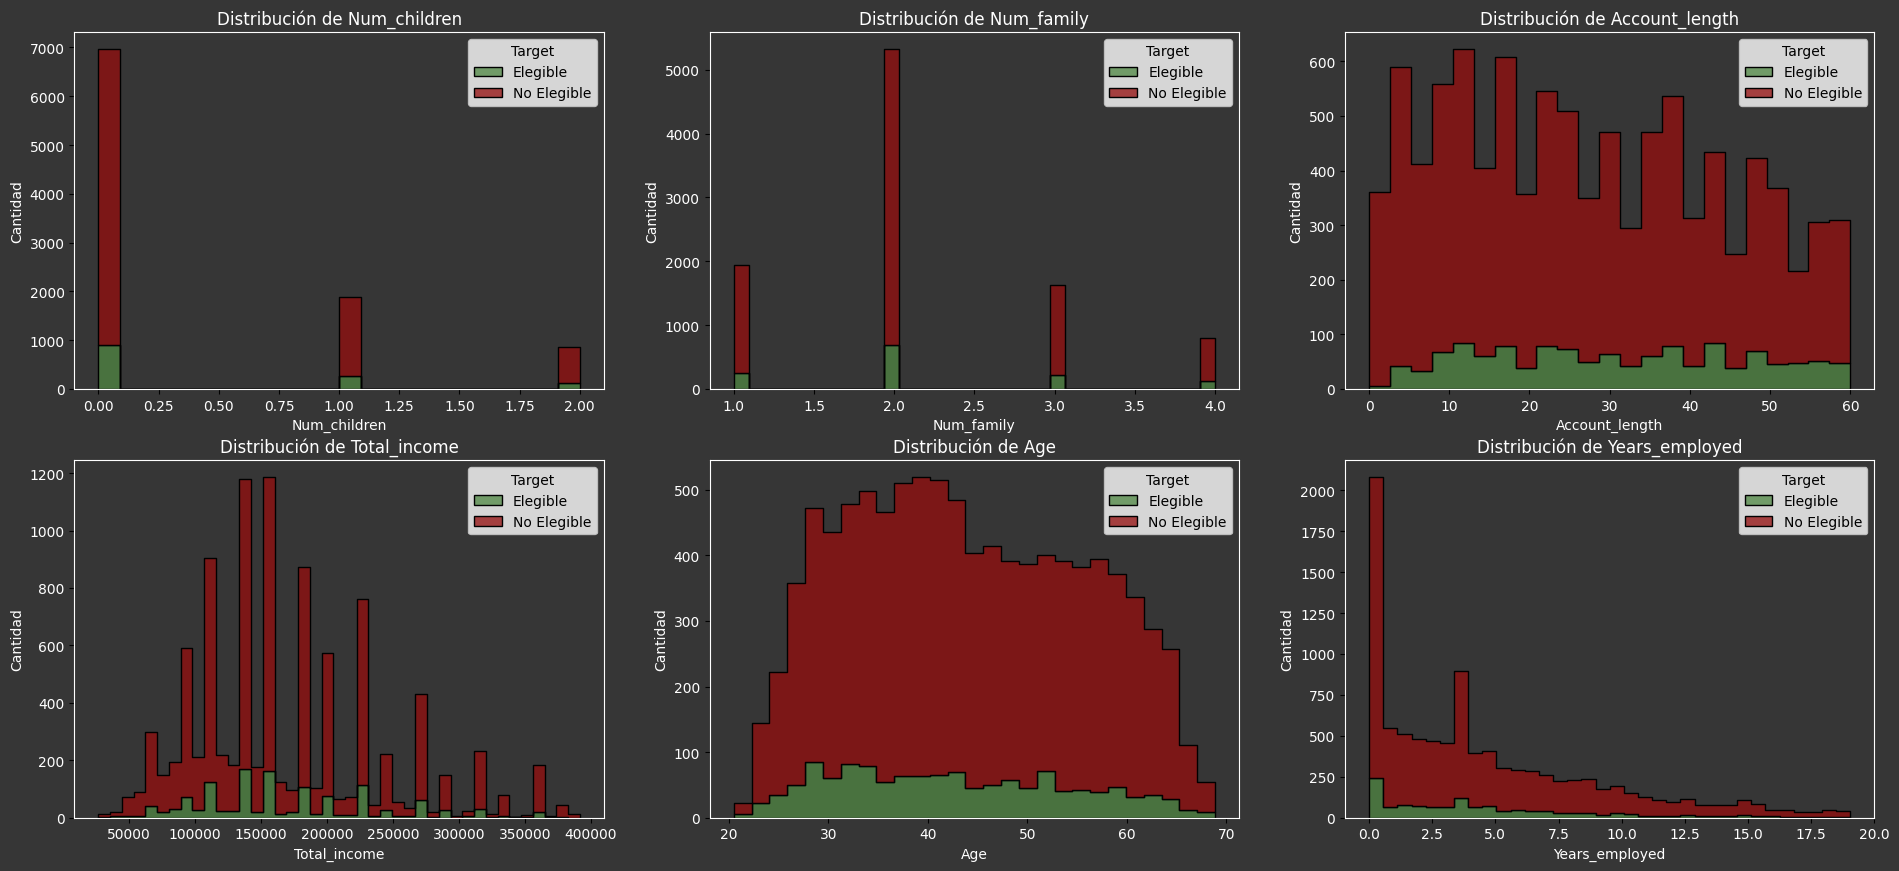

In [15]:
plt.figure(figsize=(60, 25))
for i,column in enumerate(num_cols.columns):
    plt.subplot(len(num_cols.columns),3,i+1)
    plt.subplots_adjust(left=0.7, right=1, top=2, bottom=1)
    sns.histplot(data=num_cols,
                  x=column, 
                  hue=df['Target'],
                  palette=['#940D0D','#508743'],
                  multiple='stack',
                  element='step',)
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.legend(title='Target', loc='upper right', facecolor='white', labels=['Elegible', 'No Elegible'])
    plt.title(f'Distribución de {column}', color='white')
    plt.ylabel('Cantidad', color='white')
    plt.xlabel(column, color='white')
plt.show()

Podemos observar:
1. La variable **Years_employed** tiene de a una distribucion sesgada a la derecha
2. Las cuentas con mas de **3 años** son mas propensas a tener una tarjeta de credito
3. Los clientes con ingresos mayores a **100000** y menores **240000** son mas propensos a tener una tarjeta de credito  
4. Los clientes sin hijos son propensos a tener una tarjeta de credito
5. Si son **2** miembros de la familia son mas propensos a tener una tarjeta de credito

Esto lo comprobaremos con un test de hipotesis

#### 5.1.2 AB testing para variables numericas

Para evaluar estadisticamente la importancia de las variables numericas con respecto a la 'Target' utilizaremos el test de hipotesis de Mann-Whitney U que es útil cuando se desea comparar dos muestras independientes.   
En el cual plantearemos:
- Hipotesis nula (H0): no hay diferencia entre las medias de la variable numerica con respecto a la 'Target'
- Hipotesis alternativa (H1): Hay diferencia entre las medias de la variable numerica con respecto a la 'Target'

Si el p-valor es menor a 0.05 rechazamos la hipotesis nula
y la consideramos Signficativa

In [16]:
# Lista para almacenar los resultados
result= []

for column in num_cols:
    # Dividimos en dos grupos
    grupo1 = num_cols.loc[df['Target']==1, column]
    grupo2 = num_cols.loc[df['Target']==0, column]
    #Test de Mann-Whitney U :
    u_stat, p_value = mannwhitneyu(grupo1, grupo2)
    # Guardamos el resultado
    result.append({'Variable': column,
                   'u_stat': u_stat,
                   'P_valor': p_value})

# Guardamos en un dataframe los resultados
df_mann= pd.DataFrame(result)
df_mann["Significativa"] = np.where(
    df_mann["P_valor"] <= 0.05, "Si", "No")
df_mann.sort_values(by='P_valor', ascending=True)

,Variable,u_stat,P_valor,Significativa
2,Account_length,6140427.0,3.799318e-15,Si
4,Age,4999343.5,1.423291e-05,Si
0,Num_children,5549508.5,5.052082e-02,No
1,Num_family,5491829.0,3.072972e-01,No
5,Years_employed,5466790.0,5.095966e-01,No
3,Total_income,5442886.5,6.867918e-01,No


Con esto podemos confirmar que las variables mas relevantes son **Account_length** y **Age**


#### 5.2 Variables categoricas

Empezaremos viendo que cantidad de categorias hay en cada columna

In [17]:
for column in cat_cols:
    print(f'{column}:{len(cat_cols[column].value_counts().index)}')

Income_type:5
Education_type:5
Family_status:5
Housing_type:6
Occupation_type:19
Gender:2
Own_car:2
Own_property:2
Work_phone:2
Phone:2
Email:2
Unemployed:2
Target:2


**Ocupation_type** tiene 19 categorias, lo cual es un numero muy alto, por lo que vamos a reducirlo segun el tipo de ocupacion  
**Gender**  la eliminaremos para evitar el sesgo de genero

In [19]:
occupation_mapping = {
    'Other': 'Other',
    'Laborers': 'Labor',
    'Sales staff': 'Other',
    'Core staff': 'Administrative',
    'Managers': 'Administrative',
    'Drivers': 'Technical',
    'High skill tech staff': 'Technical',
    'Accountants': 'Administrative',
    'Medicine staff': 'Service',
    'Cooking staff': 'Service',
    'Security staff': 'Other',
    'Cleaning staff': 'Service',
    'Private service staff': 'Service',
    'Low-skill Laborers': 'Labor',
    'Secretaries': 'Administrative',
    'Waiters/barmen staff': 'Service',
    'HR staff': 'Administrative',
    'IT staff': 'Technical',
    'Realty agents': 'Administrative',
}
# Mapeamos la variable
cat_cols['Occupation_type'] = df['Occupation_type'].map(occupation_mapping)
cat_cols.drop('Gender', axis=1 , inplace=True)

#### 5.2.1 Variables categoricas Binarias

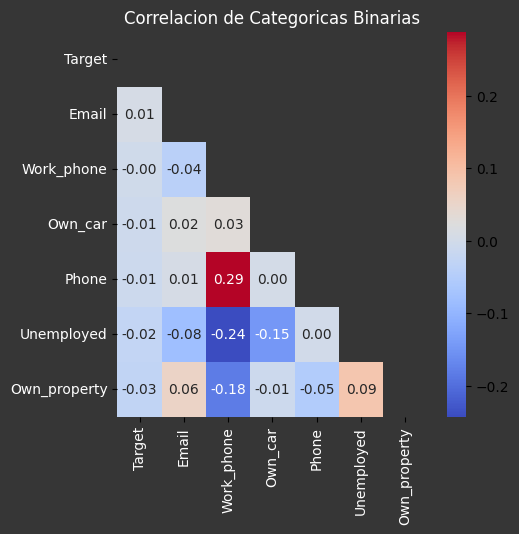

In [20]:
# Correlacion entre variables numericas
df_corr = cat_cols.copy()
df_corr['Target']=df['Target']
mask = np.triu(np.ones_like(df_corr.corr(numeric_only='True'), dtype=bool))
corr = df_corr.corr(numeric_only='True').sort_values(by='Target', ascending=False, axis=0).sort_values(by='Target', ascending=False, axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f",
            mask= mask
            )
plt.xticks(color='white')
plt.yticks(color='white')
plt.title("Correlacion de Categoricas Binarias", color='white')
plt.show()

La mayor correlacion se encuentra entre **Unemployed** y **Own_property** veamos su disribucion con respecto

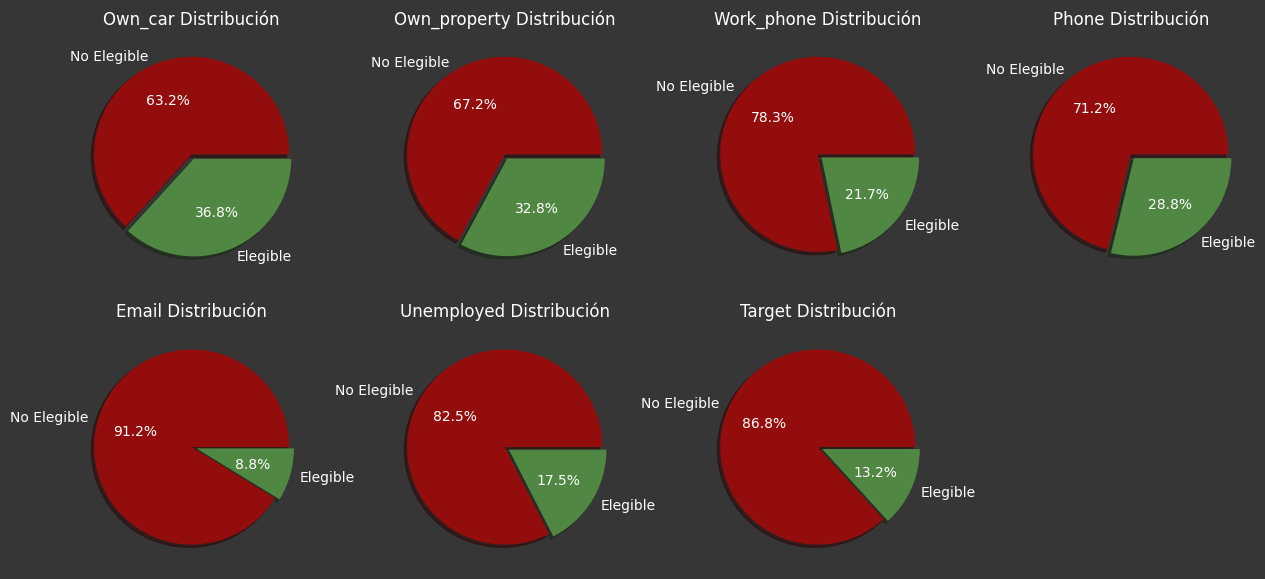

In [21]:
cat_cols_graph= cat_cols.copy()
plt.figure(figsize=(40, 20))
for i,column in enumerate(cat_cols_graph.select_dtypes(include= np.number).columns):
    plt.subplots_adjust(left=0.7, right=1, top=2, bottom=1)
    plt.subplot(len(cat_cols_graph.select_dtypes(include=np.number).columns),4,i+1)    
    plt.pie(cat_cols_graph[column].value_counts(),
            explode=(0, 0.05),
            labels=['No Elegible', 'Elegible'],
            autopct='%1.1f%%', 
            shadow=True, 
            colors=['#940D0D','#508743'],
            textprops={'color':'white'})
    plt.title(f'{column} Distribución', color='white',)
plt.show()

Podemos observar lo siguiente:  
1. La variable objetivo 'Target' esta desbalanceada, tendremos que aplicarles tecnicas de balanceo y asi mejorar la prediccion
2. Los clientes que tienen propiedad y coche son mas propensos a tener tarjeta de credito
3. Los clientes desempleados son menos propensos a tener tarjeta de credito

#### 5.2.2 Variables categoricas Multiclase

Empezaremos viendo las distribucion de las variables categoricas con respecto a la target

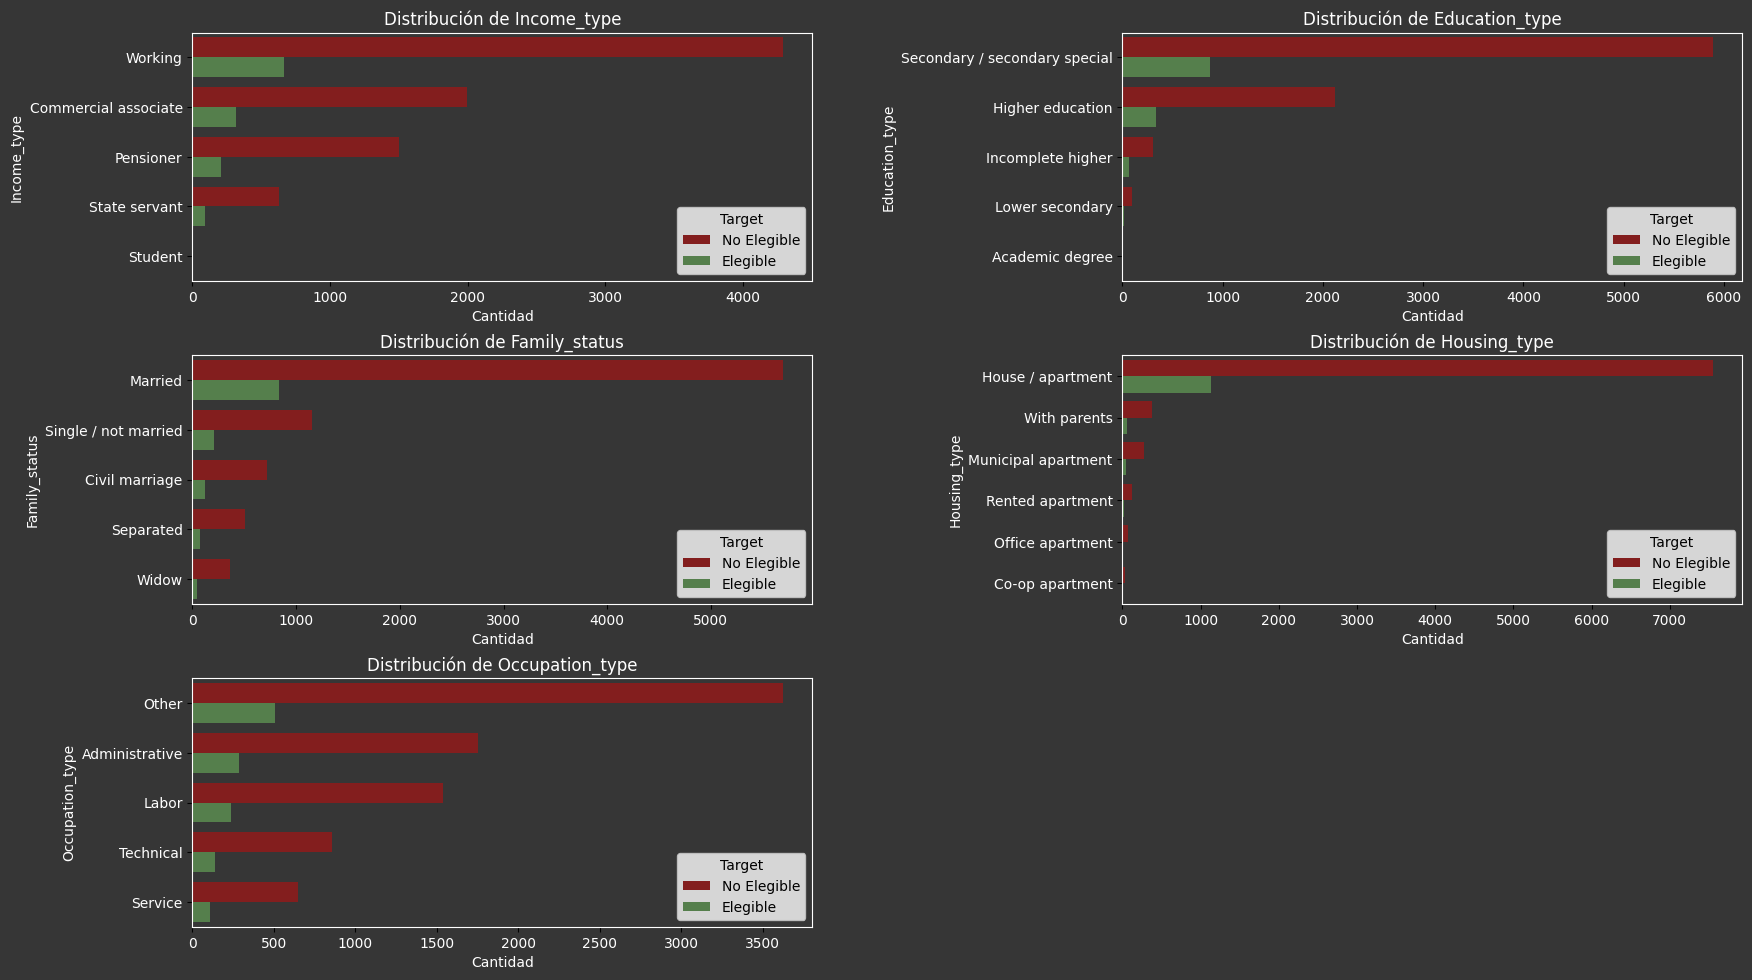

In [22]:
plt.figure(figsize=(20, 20))
for i,column in enumerate(cat_cols.select_dtypes(include='object').columns):
    plt.subplot(len(cat_cols.select_dtypes(include='object').columns),2,i+1)
    plt.subplots_adjust(wspace=0.5, hspace=0.3)
    sns.countplot(data=cat_cols,
                  y=column, 
                  hue=cat_cols['Target'], 
                  order=cat_cols[column].value_counts().index, 
                  palette=['#940D0D','#508743'])
    plt.xlabel('Cantidad', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.legend(title='Target', loc='lower right', facecolor='white', labels=['No Elegible', 'Elegible'])
    plt.title(f'Distribución de {column}', color='white')
    plt.xlabel('Cantidad', color='white')
    plt.ylabel(column, color='white')
plt.show()

Podemos observar lo siguiente:
1. los clientes con trabajo son mas propensos a tener tarjeta de credito
2. Los clientes con nivel educativo 'Secundary/secondary special' son mas propensos a tener tarjeta de credito
3. Los clientes con estado civil 'Married' son mas propensos a tener tarjeta de credito
4. Los clientes con tipo de vivienda 'House/apartment' son mas propensos a tener tarjeta de credito

Vamos a aplicar un test de hipotesis para confirmar la importancia de las variables categoricas

#### 5.2.3 AB testing para variables categoricas

Empezaremos a evualuar la importancia de las variables categoricas con respecto a la 'Target' mediante el test de hipotesis Chi-cuadrado.
en el cual plantearemos:
- Hipotesis nula (H0): no hay relación entre la variable categorica y la 'Target'  
- Hipotesis alternativa (H1): Hay relación entre la variable categorica y la 'Target'  

Si el p-valor es menor a 0.05 rechazamos la hipotesis nula  
y la consideramos Signficativa

In [42]:
# Lista para almacenar los resultados
result= []

for column in cat_cols.drop('Target', axis= 1):
    # Calculamos la tabla de contingencia
    tb_contigencia= pd.crosstab(cat_cols[column], df['Target'])
    #Test de Chi Cuadrado:
    chi2 , p_value = chi2_contingency(tb_contigencia)[:2]
    # Guardamos el resultado
    result.append({'Variable': column,
                   'chi_cuadrado':chi2,
                   'P_valor': p_value})

# Guardamos en un dataframe los resultados
df_chi2= pd.DataFrame(result)
df_chi2["Significativa"] = np.where(
    df_chi2["P_valor"] <= 0.05, "Si", "No")
df_chi2.sort_values(by='P_valor', ascending=True)

,Variable,chi_cuadrado,P_valor,Significativa
6,Own_property,7.559452,0.005970,Si
10,Unemployed,5.840184,0.015664,Si
2,Family_status,8.263560,0.082387,No
1,Education_type,7.688654,0.103672,No
4,Occupation_type,5.673994,0.224853,No
3,Housing_type,5.407396,0.368207,No
8,Phone,0.808517,0.368559,No
0,Income_type,3.519132,0.474975,No
9,Email,0.428884,0.512537,No
5,Own_car,0.406571,0.523715,No


Con esto podemos confirmar que las variables mas relevantes son **Own_property** y **Unemployed** 


#### 6 Union los datasets numericos y categoricos

In [26]:
df= num_cols.join(cat_cols)

#### 6.1 Feature Importance

Para finalizar vamos evaluaremos la importancia de las variables usando un modelo de CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier
# Enumeracion de los ID para las columnas categoricas
id_cat =[]
df_sin_Y = df.drop('Target', axis=1)
for id, col in enumerate(df_sin_Y):
    if col in str_cols:
        id_cat.append(id)

clf = CatBoostClassifier(random_state= 42 , cat_features= id_cat , silent= True)
clf.fit(df_sin_Y, df['Target'])
importancia= pd.DataFrame(zip(clf.feature_importances_,clf.feature_names_),columns=['importancia','variable']).sort_values('importancia',ascending=False)


,importancia,variable
2,19.012544,Account_length
4,14.491871,Age
5,10.931830,Years_employed
3,9.542144,Total_income
8,8.429226,Family_status
10,8.033511,Occupation_type
6,6.773892,Income_type
9,5.403886,Housing_type
7,5.101068,Education_type
1,3.109050,Num_family


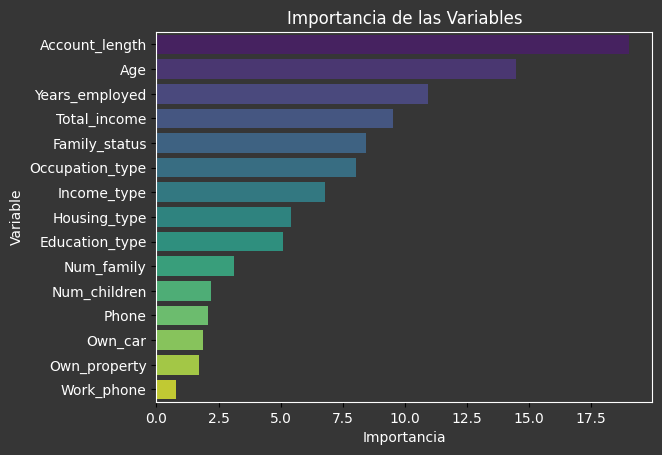

In [38]:
sns.barplot(data=importancia.head(15), x='importancia', y='variable', palette='viridis')
plt.title('Importancia de las Variables', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Importancia', color='white')
plt.ylabel('Variable', color='white')
plt.show()

Las variables mas importantes son:
1. **Account_length**
2. **Age**
3. **Total_income**
4. **Years_employed**: que podemos sustituir por **Unemployed** ya que son variables muy correlacionadas y podemos tomar 0 como desempleado

Descartaremos la variable **Own_property** ya que esta relacionada con **Total_income**

#### 6.2 Creacion del dataset con las variables elegidas

In [66]:
df_ML = df[['Account_length', 'Age', 'Total_income', 'Years_employed', 'Target']]

In [67]:
df_ML.head(10)

,Account_length,Age,Total_income,Years_employed,Target
0,15,32.868574,157500.0,12.435574,1
1,29,58.793815,112500.0,3.104787,0
2,4,52.321403,270000.0,8.353354,0
3,20,61.504343,283500.0,0.000000,0
4,5,46.193967,270000.0,2.105450,0
5,17,48.674511,135000.0,3.269061,0
6,25,29.210730,130500.0,3.019911,1
7,31,27.463945,157500.0,4.021985,1
8,44,30.029364,112500.0,4.435409,0
9,24,34.741302,270000.0,3.184186,0


#### 6.3 Guardamos el dataset para el modelo

In [68]:
df_ML.to_csv('data/processed/dataset_ML.csv', index=False)